**Import Modules**

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import nltk
import tweepy
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import os
os.chdir('F:/Use Cases ML/SMA')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Importing twitter API credentials**

In [2]:
%run ./keys_tweeter.ipynb
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
search_terms = 'spinal muscular atrophy '
#search_words = ["spinal muscular atrophy", "SMA", "#spinal muscular atrophy"]
lang = 'english'
date_since = "2021-05-01"
#date_until = "2021-05-12"
tweets = []
likes = []
time = []
#cursor = tweepy.Cursor(api.search,q=search_terms,tweet_mode = "extended",since='2021-01-01', until='2021-05-10').items()
for i in tweepy.Cursor(api.search,q=search_terms,lang="en",tweet_mode = "extended",\
                       since_id=date_since,count=5000).items():
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [4]:
df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})

In [5]:
df = df.drop_duplicates(keep=False)
df.head()

tweets  likes  \
0  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
1  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
2  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
3  RT @Ntripathi1990: @DoctorAjayita Plz extend a...      0   
4  @HansrajMeena Plz extend a little help to @Fig...      0   

                 time  
0 2021-05-13 14:53:07  
1 2021-05-13 14:52:20  
2 2021-05-13 14:50:47  
3 2021-05-13 14:50:37  
4 2021-05-13 14:50:12

**Preprocessing the dataset**

In [6]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [7]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweets'], "@[\w]*")

In [8]:
df.head()

tweets  likes  \
0  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
1  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
2  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
3  RT @Ntripathi1990: @DoctorAjayita Plz extend a...      0   
4  @HansrajMeena Plz extend a little help to @Fig...      0   

                 time                                        clean_tweet  
0 2021-05-13 14:53:07  RT :  Plz extend a little help to  this #EidAl...  
1 2021-05-13 14:52:20  RT :  Plz extend a little help to  this #EidAl...  
2 2021-05-13 14:50:47  RT :  Plz extend a little help to  this #EidAl...  
3 2021-05-13 14:50:37  RT :  Plz extend a little help to .3yr old can...  
4 2021-05-13 14:50:12   Plz extend a little help to  this #EidAlFitr ...

In [9]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

tweets  likes  \
0  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
1  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
2  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
3  RT @Ntripathi1990: @DoctorAjayita Plz extend a...      0   
4  @HansrajMeena Plz extend a little help to @Fig...      0   

                 time                                        clean_tweet  
0 2021-05-13 14:53:07  RT    Plz extend a little help to  this #EidAl...  
1 2021-05-13 14:52:20  RT    Plz extend a little help to  this #EidAl...  
2 2021-05-13 14:50:47  RT    Plz extend a little help to  this #EidAl...  
3 2021-05-13 14:50:37  RT    Plz extend a little help to   yr old can...  
4 2021-05-13 14:50:12   Plz extend a little help to  this #EidAlFitr ...

In [10]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

tweets  likes  \
0  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
1  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
2  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
3  RT @Ntripathi1990: @DoctorAjayita Plz extend a...      0   
4  @HansrajMeena Plz extend a little help to @Fig...      0   

                 time                                        clean_tweet  
0 2021-05-13 14:53:07  extend little help this #EidAlFitr even hold h...  
1 2021-05-13 14:52:20  extend little help this #EidAlFitr even hold h...  
2 2021-05-13 14:50:47  extend little help this #EidAlFitr even hold h...  
3 2021-05-13 14:50:37  extend little help even hold head Spinal Muscu...  
4 2021-05-13 14:50:12  extend little help this #EidAlFitr even hold h...

In [11]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [extend, little, help, this, #EidAlFitr, even,...
1    [extend, little, help, this, #EidAlFitr, even,...
2    [extend, little, help, this, #EidAlFitr, even,...
3    [extend, little, help, even, hold, head, Spina...
4    [extend, little, help, this, #EidAlFitr, even,...
Name: clean_tweet, dtype: object

In [12]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [extend, littl, help, thi, #eidalfitr, even, h...
1    [extend, littl, help, thi, #eidalfitr, even, h...
2    [extend, littl, help, thi, #eidalfitr, even, h...
3    [extend, littl, help, even, hold, head, spinal...
4    [extend, littl, help, thi, #eidalfitr, even, h...
Name: clean_tweet, dtype: object

In [13]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

tweets  likes  \
0  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
1  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
2  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
3  RT @Ntripathi1990: @DoctorAjayita Plz extend a...      0   
4  @HansrajMeena Plz extend a little help to @Fig...      0   

                 time                                        clean_tweet  
0 2021-05-13 14:53:07  extend littl help thi #eidalfitr even hold hea...  
1 2021-05-13 14:52:20  extend littl help thi #eidalfitr even hold hea...  
2 2021-05-13 14:50:47  extend littl help thi #eidalfitr even hold hea...  
3 2021-05-13 14:50:37  extend littl help even hold head spinal muscul...  
4 2021-05-13 14:50:12  extend littl help thi #eidalfitr even hold hea...

**Exploratory Data Analysis**

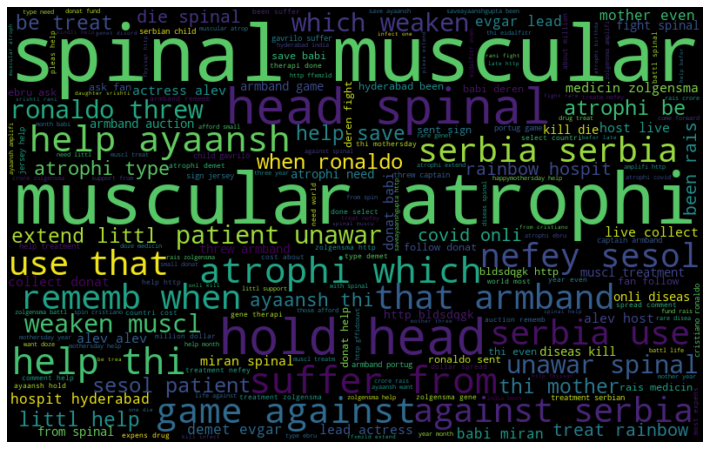

In [14]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from sklearn.feature_extraction import text
add_stop_words = ['https', 'get', 'many', 'have', 'hold', 'sir','need','help','plz','make','available','pls','from']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42,max_font_size=100,stopwords=stop_words).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
import nltk
#vador lexicon approach
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [17]:
df['clean_tweet_score'] = df['clean_tweet'].apply(lambda review: sia.polarity_scores(review))

In [18]:
df['sentiment_clean_tweet_score'] = df['clean_tweet_score'].apply(lambda x:x['compound'])

In [19]:
df['compound_score'] = df['sentiment_clean_tweet_score'].apply(lambda score: 'pos' if score > 0 else 'neg')

In [20]:
df.head()

tweets  likes  \
0  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
1  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
2  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
3  RT @Ntripathi1990: @DoctorAjayita Plz extend a...      0   
4  @HansrajMeena Plz extend a little help to @Fig...      0   

                 time                                        clean_tweet  \
0 2021-05-13 14:53:07  extend littl help thi #eidalfitr even hold hea...   
1 2021-05-13 14:52:20  extend littl help thi #eidalfitr even hold hea...   
2 2021-05-13 14:50:47  extend littl help thi #eidalfitr even hold hea...   
3 2021-05-13 14:50:37  extend littl help even hold head spinal muscul...   
4 2021-05-13 14:50:12  extend littl help thi #eidalfitr even hold hea...   

                                   clean_tweet_score  \
0  {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...   
1  {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...   
2  {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...   
3  {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...   
4  {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...   

   sentiment_clean_tweet_score compound_score  
0                       0.5267            pos  
1                       0.5267            pos  
2                       0.5267            pos  
3                       0.5267            pos  
4                       0.7269            pos

In [21]:
#Intution about the percentage of male / female survival rate
def bar_chart(feature):
    positive = df[df['compound_score'] == 'pos'][feature].value_counts()
    negative = df[df['compound_score'] == 'neg'][feature].value_counts()
    df1 = pd.DataFrame([positive,negative])
    df1.index = ['positive','negative']
    df1.plot(kind = 'bar',stacked = True,figsize=(10,5))

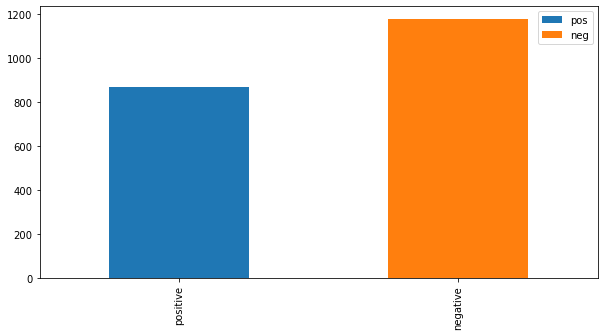

In [22]:
bar_chart('compound_score')

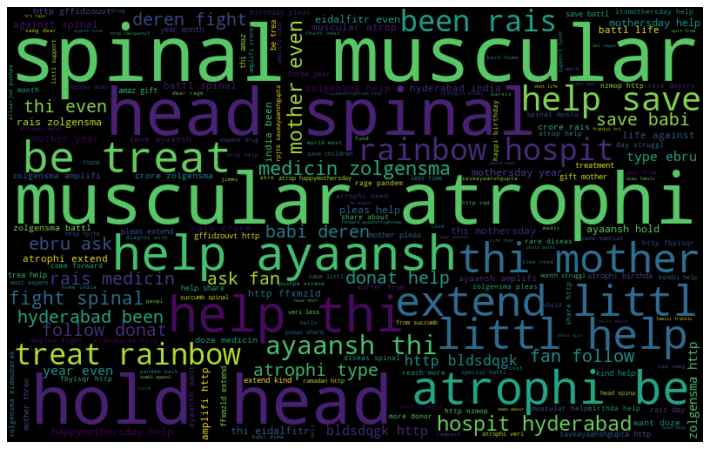

In [23]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['compound_score']=='pos']])
add_stop_words = ['https', 'get', 'many', 'have', 'hold', 'sir','need','help','plz','make','available','pls','from']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100,stopwords=stop_words).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

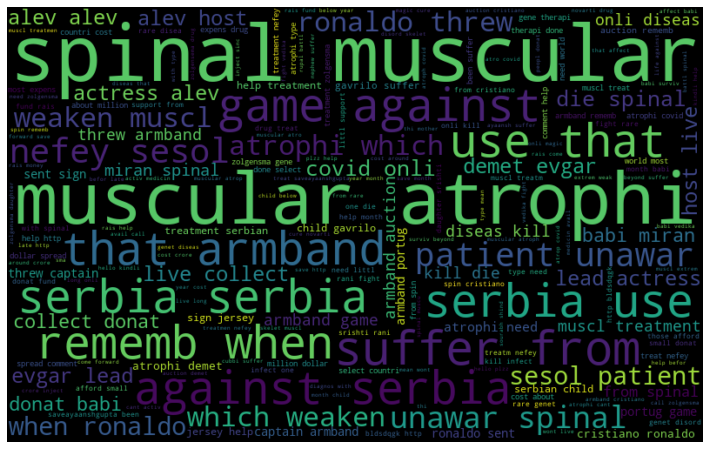

In [24]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['compound_score']=='neg']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
#extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [26]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['compound_score']=='pos'])

# # extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['compound_score']=='neg'])

In [27]:
ht_positive = [x for x in ht_positive if x != []]
ht_positive = [k for k in ht_negative if k != []]

In [28]:
ht_positive

[['stockmarket', 'stock'],
 ['stockmarket'],
 ['vedika'],
 ['hyderabad'],
 ['disabl'],
 ['bradesplac',
  'uniquemedicalcareforuniquekid',
  'sma',
  'spinalmuscularatrophi',
  'diagnosisday'],
 ['spinal'],
 ['zolgensma'],
 ['spinal', 'atrophi'],
 ['saveayaanshgupta'],
 ['sma', 'cme'],
 ['sma', 'feedkast'],
 ['gemin',
  'protein',
  'complex',
  'advanc',
  'spinal',
  'muscular',
  'atrophi',
  'discoveri',
  'intern',
  'collabor',
  'research',
  'genet',
  'caus',
  'neurolog',
  'disord',
  'development',
  'delay',
  'ataxia',
  'mlo',
  'lablin'],
 ['nih', 'neuron', 'sma'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['zolgensma', 'spinalmuscularatrophi', 'rarediseas', 'savecubbi'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['ihelpyuvaan'],
 ['sma'],
 ['saveayaanshgupta'],
 ['mirhananefesol'],
 ['mirhananefesol'],
 ['mirhananefesol'],
 ['mirhananefesol'],
 ['mirhananefesol'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['sa

In [29]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets'].apply(pol)
df['subjectivity'] = df['tweets'].apply(sub)
df.head()

tweets  likes  \
0  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
1  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
2  RT @Ntripathi1990: @avinashonly Plz extend a l...      0   
3  RT @Ntripathi1990: @DoctorAjayita Plz extend a...      0   
4  @HansrajMeena Plz extend a little help to @Fig...      0   

                 time                                        clean_tweet  \
0 2021-05-13 14:53:07  extend littl help thi #eidalfitr even hold hea...   
1 2021-05-13 14:52:20  extend littl help thi #eidalfitr even hold hea...   
2 2021-05-13 14:50:47  extend littl help thi #eidalfitr even hold hea...   
3 2021-05-13 14:50:37  extend littl help even hold head spinal muscul...   
4 2021-05-13 14:50:12  extend littl help thi #eidalfitr even hold hea...   

                                   clean_tweet_score  \
0  {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...   
1  {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...   
2  {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...   
3  {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...   
4  {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...   

   sentiment_clean_tweet_score compound_score  polarity  subjectivity  
0                       0.5267            pos -0.070833      0.358333  
1                       0.5267            pos -0.070833      0.358333  
2                       0.5267            pos -0.070833      0.358333  
3                       0.5267            pos -0.070833      0.358333  
4                       0.7269            pos -0.070833      0.358333

**Model building**

In [30]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [31]:
label_map = {'pos':0,'neg':1,}
df['label'] = df['compound_score'].map(label_map)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

**Model Training**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [34]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.9809523809523809

In [36]:
accuracy_score(y_test,pred)

0.9765625

In [37]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.9779179810725552

In [38]:
accuracy_score(y_test,pred)

0.97265625